In [1]:
# Install d2l
!pip install d2l==0.17.2

  Using cached matplotlib-3.3.3-cp37-cp37m-manylinux1_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
# Import Library
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

In [3]:
# Generating the Dataset
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([ 0.501639  -0.7412602], shape=(2,), dtype=float32) 
label: tf.Tensor([7.7337165], shape=(1,), dtype=float32)


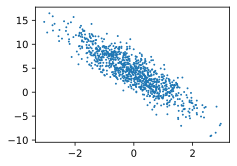

In [6]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

In [7]:
#Reading the Dataset
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[ 0.40822673 -0.81043744]
 [-0.26889235  0.45820856]
 [-2.3379138   1.5106406 ]
 [ 0.25604805 -0.9757168 ]
 [-1.1671001  -1.575289  ]
 [-0.3085195   0.85069406]
 [-0.87859493 -1.2348804 ]
 [ 0.03747004 -1.43575   ]
 [-0.25124556  0.49517104]
 [-0.32453647  0.576973  ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 7.77962   ]
 [ 2.1042988 ]
 [-5.616251  ]
 [ 8.022148  ]
 [ 7.216117  ]
 [ 0.69151634]
 [ 6.644559  ]
 [ 9.14863   ]
 [ 2.0101435 ]
 [ 1.5978068 ]], shape=(10, 1), dtype=float32)


In [9]:
# Initializing Model Parameters
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [10]:
# Defining the Model
def linreg(X, w, b): 
    """The linear regression model."""
    return tf.matmul(X, w) + b

In [11]:
# Defining the Loss Function
def squared_loss(y_hat, y):
    """Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

In [12]:
# Defining the Optimization Algorithm
def sgd(params, grads, lr, batch_size): 
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [13]:
# Training
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.027575
epoch 2, loss 0.000097
epoch 3, loss 0.000052


In [14]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [0.00056458 0.00012231]
error in estimating b: [-0.00043392]
